In [1]:
from os import listdir
import xml.etree.ElementTree as ET
import cv2

In [2]:
from scipy.ndimage.measurements import label
import numpy as np
from random import shuffle

In [3]:
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
fin1 = open('dataset/digital_words_clean_0_2000.json', 'rb')
#fin2 = open('dataset/digital_words_clean_1000_2000.json', 'rb')
data = json.load(fin1)
#data2 = json.load(fin2)

#data.update(data2)

fin1.close()
#fin2.close()

In [19]:
out_data = {}
chars = {}
words = {}
for d in data.keys():
    text = data[d]
    chs = list(text)
    for ch in chs:
        if ch not in chars:
            chars[ch] = 1
        else:
            chars[ch] += 1
    text = text.replace('\t', '')
    out_data[d] = text
    
    if text not in words:
        words[text] = 1
    else:
        words[text] += 1
    

#fout = open('dataset/digital_words_clean_0_2000.json', 'wb')
#json.dump(out_data, fout)
#fout.close()

In [20]:
fout = open('dataset/digital_words_train_test.json','wb')

In [21]:
dataset = []

for d in data.keys():
    if '\t' not in data[d]:
        dataset.append([d, data[d]])
    
shuffle(dataset)
train = dataset[:int(len(dataset)*0.7)]
test = dataset[int(len(dataset)*0.7):]

print len(train), len(test)

200550 85951


In [22]:
out = {}

out['abc'] = ''.join(chars.keys())
out['train'] = [{"text": t[1], "name": t[0] + '.png'} for t in train]
out['test'] = [{"text": t[1], "name": t[0] + '.png'} for t in test]

In [23]:
json.dump(out, fout)

In [24]:
fout.close()

In [25]:
char_dic = {}
for char in chars.keys():
    char_dic['U+%04X' % (ord(char),)] = char
  
print(len(dataset))
print(len(char_dic.keys()))

286501
73


In [26]:
lst = char_dic.keys()
lst.sort()

for l in lst:
    print l, char_dic[l], chars[char_dic[l]]

U+0901 ँ 8
U+0902 ं 42875
U+0903 ः 48
U+0905 अ 17523
U+0906 आ 12808
U+0907 इ 7352
U+0908 ई 5580
U+0909 उ 6596
U+090A ऊ 303
U+090B ऋ 46
U+090F ए 13141
U+0910 ऐ 86
U+0911 ऑ 716
U+0913 ओ 2863
U+0914 औ 192
U+0915 क 84815
U+0916 ख 10533
U+0917 ग 26063
U+0918 घ 2484
U+091A च 16150
U+091B छ 3368
U+091C ज 35444
U+091D झ 1553
U+091E ञ 298
U+091F ट 18383
U+0920 ठ 2807
U+0921 ड 14774
U+0922 ढ 953
U+0923 ण 6922
U+0924 त 50981
U+0925 थ 5927
U+0926 द 32456
U+0927 ध 11279
U+0928 न 73896
U+0929 ऩ 3
U+092A प 40011
U+092B फ 9677
U+092C ब 29866
U+092D भ 10735
U+092E म 57353
U+092F य 38281
U+0930 र 114876
U+0932 ल 69276
U+0935 व 52382
U+0936 श 22835
U+0937 ष 9654
U+0938 स 77415
U+0939 ह 27122
U+093C ़ 3413
U+093E ा 161180
U+093F ि 87471
U+0940 ी 55985
U+0941 ु 22893
U+0942 ू 9119
U+0943 ृ 1406
U+0945 ॅ 309
U+0947 े 49076
U+0948 ै 6265
U+0949 ॉ 3124
U+094B ो 31276
U+094C ौ 4463
U+094D ् 78965
U+0958 क़ 14
U+0959 ख़ 8
U+095B ज़ 97
U+095C ड़ 4032
U+095D ढ़ 1060
U+095E फ़ 9
U+0964 । 9832
U+0966 ० 7
U+0967 १ 2
U+096

In [27]:
print(len(words.keys()))
print(len(dataset))

117162
286501


In [28]:
DATA_DIR = 'dataset/digital_words/'

for i in range(1,100,10):
    fig = plt.figure(figsize=(20, 10))
    column = 0
    for j in range(10):
        img = cv2.imread(DATA_DIR + dataset[i * 10 + j][0] + '.png')
        img = cv2.resize(img,(160,64))
        column += 1
        fig.add_subplot(1, 10, column)
    
        img = img[1:-15,:,:]
        img = cv2.resize(img, (320,32))
        plt.imshow(img)
        plt.axis('off')
    

error: OpenCV(3.4.1-dev) /home/sagan/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215) Assertion failed: ssize.width > 0 && ssize.height > 0 in function resize


In [111]:
fin = open('dataset/iden', 'r')

shapes = []
for line in fin.readlines():
    shapes.append(map(int, line.split()[2].split('x')))

fin.close()

shapes = np.asarray(shapes)

In [29]:
print 'max height:', shapes[:, 0].max()
print 'min height:', shapes[:, 0].min()
print 'average height:', np.sum(shapes[:, 0])/shapes.shape[0]

print 'max width:', shapes[:, 1].max()
print 'min width:', shapes[:, 1].min()
print 'average width:', np.sum(shapes[:, 1])/shapes.shape[0]

ratios = np.divide(shapes[:,0], shapes[:,1] * 1.0)
print 'max ratio:', ratios.max()
print 'min ratio:', ratios.min()
print 'average ratio:', np.sum(ratios) / (shapes.shape[0] * 1.0)

max height:

NameError: name 'shapes' is not defined

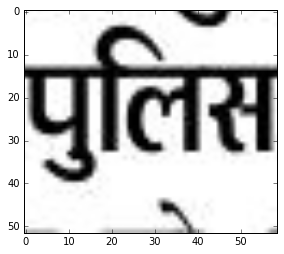

In [169]:
img = cv2.imread(DATA_DIR + dataset[5][0] + '.png')
plt.imshow(img)

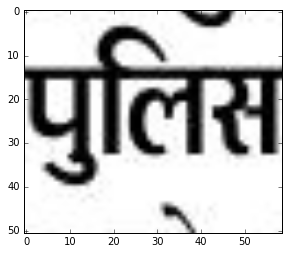

In [173]:
bottom = img.shape[0]-1
for i in range(img.shape[0]-10):
    if np.count_nonzero(img[i:i+10,:,:]) == (10 * img.shape[1] * img.shape[2]):
        print i
        bottom = i + 5
        
plt.imshow(img[0:bottom,:,:])

In [86]:
fin = open('dataset/epaper.lst', 'r')

to_download = []
for line in fin.readlines():
    url_parts = line.split('#')
    #print url_parts
    for i in range(1,11):
        date = str(i+1).zfill(2) + '042018'
        
        for j in range(1,16):
            url = url_parts[0] + '/' + date + '/' + str(i) + url_parts[1][:-8] + str(j) + '-0.PDF'
            to_download.append(url)
            
            

In [87]:
fout = open('dataset/download_epaper.lst','w')

i = 1
for i in range(len(to_download)):
    fout.write('wget ' + to_download[i] + ' &\n')
    
    if i % 44 == 0:
        fout.write('wait\n')
    
    i += 1

fout.close()

In [89]:
import sys
import unicodedata

import regex # $ pip install regex
lst = []
for i in xrange(sys.maxunicode + 1):
    u = unichr(i)
    if regex.match(u"[[:space:]]", u):
        try:
            name = unicodedata.name(u)
        except ValueError:
            name = ""
        lst.append('U+%04X' % (ord(u),))

In [153]:
print lst

In [6]:
import PyPDF2

In [7]:
f = open('temp.pdf', 'rb')

In [35]:
fileReader = PyPDF2.PdfFileReader(f)

In [36]:
fileReader.getFields()

In [22]:
dat = fileReader.getPage(0)

In [23]:
dat.keys()

['/Contents',
 '/Parent',
 '/TrimBox',
 '/Resources',
 '/Rotate',
 '/CropBox',
 '/MediaBox',
 '/ArtBox',
 '/BleedBox',
 '/Type']

In [30]:
resources = dat['/Resources']

In [31]:
resources.keys()

['/ColorSpace', '/XObject', '/Font', '/ProcSet', '/ExtGState']

In [37]:
import textract

In [38]:
text = textract.process('temp.pdf', method='pdfminer')

In [39]:
words = text.split()

In [40]:
len(words)

1995

In [44]:
for word in words:
    print word

Sudoku
:
1659
7
5
4
2
6
9
3
4
6
5
1
4
1
7
5
4
1
3
9
2
4
5
8
9
6
6
7
5
8
9
1
4
2
1
4
3
1
7
2
5
8
4
9
5
हल-1658
9
5
8
6
7
6
3
4
2
7
1
3
1
2
7
6
9
8
4
6
5
7
4
3
1
6
8
5
7
3
4
9
2
8
3
8
5
8
7
3
4
2
1
9
6
2
1
9
5
2
4
1
9
3
6
6
4
9
8
1
5
2
3
7
8
5
9
2
4
3
7
6
1
1
6
कैसे
खेलें
वगमा
को
1
से
९
तक
अंकों
से
ऐसे
भरें
त्क
आड़ी
व
खड़ी
पंसकत
के
सा्
ही
3
गुणा
3
के
बॉकस
में
1
से
9
तक
अंक
आएं।
कोई
अंक
ररपीट
न
हो।
ववविष्ट
न्या्याल्
कया
फैसलया
भीलवा़िा
में
दतलि
की
तबंदरोली
ररोकने
पर
8
दरोतषर्चों
करो
6
महीने
की
सजा
लीगल
ररपरोट्डर
|
भीलवा़िा
वववशषटि
नरारालिर
(एससी-एसटिी
अतराचार
अवधवनरम)
ने
मंगलिवार
को
दवलित
की
वबंदौलिी
रोकने
तथिा
मेहमानों
से
मारपीटि
के
8
दोवषरों
को
6-6
माह
की
सजा
सुनाई।
दोवषरों
पर
2-2
हजार
रुपए
का
जुमा्यना
िी
लिगारा।
प्कर्ण
के
अनुसार,
14
मई
2013
को
प्ेम
बलिाई
ने
आसींद
थिाने
में
ररपोटि्ट
दज्य
कराई।
वजसमें
बतारा
वक
12
मई
2013
को
उसके
पुत्र
बाबू
लिालि
का
वववाह
थिा।
एक
वदन
पहलिे
11
मई
रात
को
गांव
में
बाबू
लिालि
को
घोडी
पर
बै्ाकर
वबंदोलिी
वनकालिी
गई।
इस
दौरान
आरोवपरों
ने
आगे
आकर
वबंदोलिी
रोक
दी।
इ

In [7]:
import pdfplumber

ImportError: No module named 'pdfplumber'

In [8]:
!wget 

char_classifier.py  data_clean.ipynb	     resnet.py
convert.py	    eccv2014_textspotting    text_spot.py
crnn-pytorch	    extract_from_digital.py
data_check.ipynb    play_newspaper.ipynb


In [1]:
print u'\u092C\u0945\u091A'

बॅच


In [2]:
print u'\u0915\u0938\u093E\u0924\u094D\u0915\u093f\u0928\u093e'

कसात्किना


In [14]:
print u'\u092a\u094d\u0930\u0924\u093f\u0938\u094d\u092a\u094d\u0930\u0927\u093e\u0905\u093e\u0947\u0902'

प्रतिस्प्रधाअाें


In [15]:
print u'\u0907\u0902\u091c\u0940\u0928\u093f\u092f\u0930\u093e\u0947\u0902'

इंजीनियराें


In [17]:
print u'\u090f\u0917\u094d\u091c\u093f\u0915\u094d\u092f\u0942\u091f\u093f\u0935'

एग्जिक्यूटिव


In [18]:
print u'\u092a\u092a\u093e\u0945\u0928'

पपाॅन


In [ ]:
बिजनेस 
डिजाइन 
डिजाइनर
होम्योपैथी 
सिलेब्रिटीज
इन्वेस्टर्स 
न्यूज़पॉइंट 
पुष्कर्णा
बॅच
दम्पतियों
जाँच
अपोइन्टमेन्ट 
जीतीं
सेवास्तोवा
कसात्किना
सूचना
प्रतिस्प्रधाअाें
आमंत्रित 
प्रतिस्पर्धाएं 
अंतर्राष्ट्रीय 
संवाददाता
वेबसाईट 
कम
कंपोजीशन
स्कीम
एमटीएनएल
की 
इंजीनियराें
कम्यूटिंग 
एजेंसियां 
ख़ुशी 
टैलेंट 
ख़ुदकुशी 
बालों
पुलिसकर्मियों 
रिकॉर्डिंग 
एग्जिक्यूटिव
खिलाफ 
वाट्सएप
फर्टिलाइजर 
सितंबर
व्यवसायियों 
पुनरीक्षण 
गुणवत्ता 
डब्लूएचओ 
शोपियां
ज़िंदगियाँ
योजनाएं
खत्म
मंत्रालय 
नवनिर्वाचित 
प्रक्रिया 
प्रॉफ़िट
पुष्टि 
एसएन 
सीबीआइ
फेरों
निरस्तीकरण 
पश्चिमांचल 
सूचना 
नकल
विद्यार्थियों 
विद्यार्थी 
स्वच्छता 
सूचना 
कठघरे
व्यवस्था 
टूर्बो
स्वच्छता 
भ्रमण 
एवं 
प्लांट 
समय 
अपराह्न 
कुण्ड
लक्ष्मी 
श्रीकान्त
फरवरी 
आइएएस
प्रदूषण
किसानी 
किसानों
कार्यशालाएं 
अन्तर्राष्ट्रीय
इलैक्ट्रॉनिक
अनुसार 
पुलिसकर्मियों 
में 
माफी
नहीं 
रद
निमंत्रण 
अधिसूचना 
रेलगाड़ियों 
अधिग्रहण 
उत्तर रेलवे 
संसाधन 
नेवीगेशन
एप्लीकेशन
टेस्टीमोनियल्स 
सीबीआइ 
आवृत्ति 
एफआइपीबी
वित्तमंत्री 
कैरेक्टर 
एड्रेस 
हसीन
पुष्टि 
बल्कि 
स्कूल 
धौनी
वेबसाईट
अरुणाचल 
एक्सप्रेस 
अरुणाचल 
रैक्सील
अधिगृहीत
शैक्षणिक 
आस्ट्रेलिया
उपराष्ट्रपति 
असवेदनशीलता
जिलाधिकारीय 
कोफमो
एडमिन 
सूचना 
बेंगलूरु
ब्यौरा 
करूंगा
कांफ्रेंसिंग 
हेतु 
केन्द्रीय
निम्नहस्ताक्षरी 
हस्ताक्षरित 
हिप्रलोनिवि 
हाइड्रोलिक 
निम्निलिखित 
आनलाइन
निविदाओं 
नक्सली 
कैम्पस
खोड़ा
आरबीआइ
एलओयू 
बाजारों 
सुविधाएं 
प्रक्रिया 
इलाकों
व्यापारियों 
दुकानें
गलतियों 
व्यापारियों 
गतिविधियों 
गतिविधियां
कॉलेज 
असिस्टेंट
जेएनयू 
बदसुलूकी 
फेल 
छात्रों 
खादी
नाइजीरियाई 
कॉलोनी
सूचना 
मजदुर 
किलोमीटर 
अनुमति 
जुर्माना
स्थिति 
पहली 
महिलाएं
सेवांए
विश्वविद्यालय 
सूचना 
अन्तगर्त
क्योंकि 
कार्यक्रमों 
ढूंढ़ा
सुधारने
लड़ाइया
जाचकर्ताओं
उचाई 
महत्वपूर्ण 
पॉयजन
घोषणापत्र 
डब्ल्यूएचओ 
असिस्टेंट 
सेंसिटिविटी 
असिस्टेंट 
पुरस्कार 
रवींद्रनाथ
हाफीज
सर्वाधिक 
ऑर्गेनाइजेशन 
सम्मेलन 
बम्बावले
डायग्नोसिस
परिक्षण 
प्रोसीजर्स
सुप्रीम कोर्ट 
नैशनल
एयरपोर्ट 
क्लाइमैक्स
बेटियों 
मामला 
बेटियों 
पुष्टि 
एयरलाइंस 
इंटरनैशनल
सूझबूझ 
आवाज 
सृजनात्मक 
दृश्यों 
थियेटर 
कला 
खुदकशी 
ट्रेन
कपड़ा
रक्तस्त्राव 
पपाॅन
प्लेबॉय 
स्टेशनों 
रिडिवेलपमेंट 
कर्मचारिय 
इनसानों
भावनाएं
फिल्मों
डिजाइनर्स 
गर्लफ्रेंड 
बॉलिवुड
सिंगापुर
आइएएस
मुआयना 
सेक्रेटरी 
कर्मचारियों 
